# 🧠 Text Preprocessing

## 📌 Project Overview
Text preprocessing is the essential first step in any NLP pipeline. It helps clean, normalize, and prepare raw text data for models — whether for traditional ML, deep learning, or LLMs.

In this notebook, we explore and compare several powerful text preprocessing techniques using:

- 🧰 NLTK
- ⚙️ SpaCy
- 🤗 Hugging Face Transformers

We will visualize, compare outputs, and analyze tradeoffs between these methods on real-world data.

## Imports

In [ ]:
# Base Libraries
import nltk
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# NLP
from nltk.corpus import twitter_samples

## Loading the data & Visualizing
We use NLTK’s `twitter_samples` dataset, which includes 10,000 tweets:
- 5,000 positive
- 5,000 negative

In [43]:
# Downloading the data
nltk.download('twitter_samples')
nltk.download('punkt')  # For tokenization
#nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [14]:
# Loading positive tweets separately
positive_tweets = twitter_samples.strings('positive_tweets.json')
# Loading negative tweets separately
negative_tweets = twitter_samples.strings('negative_tweets.json')

# Loading the Positive & Negative tweets
tweets = twitter_samples.strings('positive_tweets.json') + twitter_samples.strings('negative_tweets.json')

# Visualizing
print("Example of first tweet loaded:", tweets[0])
print("Total number of tweets:", len(tweets))
print("Total number of positive tweets:", len(positive_tweets))
print("Total number of negative tweets:", len(negative_tweets))
print("Type of 'tweets'", type(tweets))
print("Type of each tweet", type(tweets[0]))

Example of first tweet loaded: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
Total number of tweets: 10000
Total number of positive tweets: 5000
Total number of negative tweets: 5000
Type of 'tweets' <class 'list'>
Type of each tweet <class 'str'>


### Visual Summary

- **Tweet Lengths**: Most tweets contain between **5 and 15 words**, as expected from short-form social media text.
- **Sentiment Classes**: There is an **equal distribution** of positive and negative tweets — 5,000 each — making it ideal for balanced comparison and preprocessing evaluation.


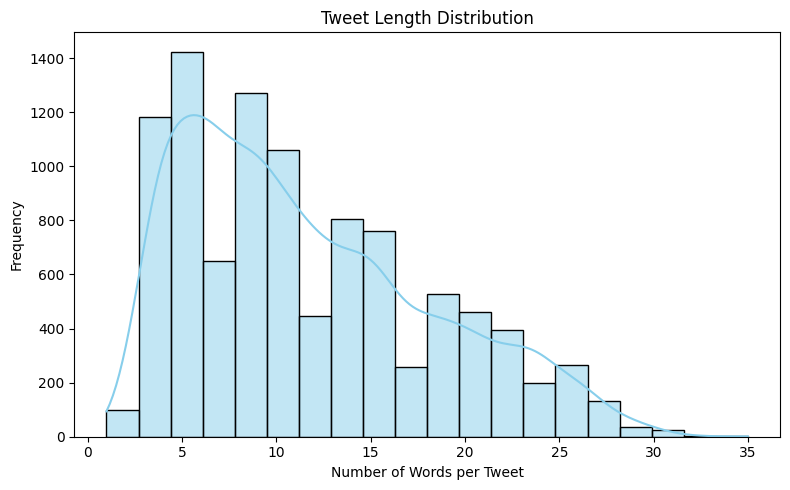

In [ ]:
# Word count per tweet
tweet_lengths = [len(tweet.split()) for tweet in tweets]

plt.figure(figsize=(8, 5))
sns.histplot(tweet_lengths, bins=20, kde=True, color='skyblue')
plt.title("Tweet Length Distribution")
plt.xlabel("Number of Words per Tweet")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


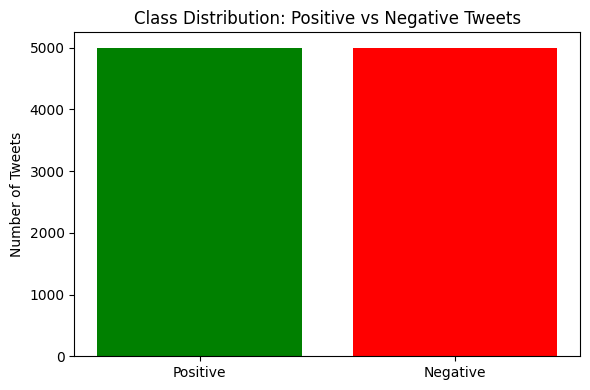

In [ ]:
# Tweet counts
labels = ['Positive', 'Negative']
counts = [len(positive_tweets), len(negative_tweets)]

# Plot
plt.figure(figsize=(6,4))
plt.bar(labels, counts, color=['green', 'red'])
plt.title("Class Distribution: Positive vs Negative Tweets")
plt.ylabel("Number of Tweets")
plt.tight_layout()
plt.show()

## Vocabulary Analysis

### Tokenizing using TweetTokenizer from NLTK
Before settling on TweetTokenizer, we tested `word_tokenize` and encountered dependency issues (punkt). 
Even after fixing them, we chose `TweetTokenizer` for its superior handling of hashtags, emojis, mentions, and informal spellings which are common in Twitter data.

In [ ]:
from nltk.tokenize import TweetTokenizer

# we set preserve_case to true, to keep words with their punctuation
# strip_handles = false, to keep the mentions in the tweets as @France_Inte
# reduce_len = True, to reduce exaggerated words in case their is any (eg."Soo" => "So")
tokenizer = TweetTokenizer(preserve_case=True, strip_handles=False, reduce_len=True)

first_tweet = tweets[0]
tokenized_first_tweet = tokenizer.tokenize(first_tweet)

print("Tweet:", first_tweet)
print("Tokenized:", tokenized_first_tweet)

Tweet: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
Tokenized: ['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']


In [45]:
# Creating a list of all words in the tweets tokenized
all_tweet_tokens = [token for tweet in tweets for token in tokenizer.tokenize(tweet)]

print(len(all_tweet_tokens))

130055


In [ ]:
# To calculate and see the count of occurrences of each token
from collections import Counter

token_freq = Counter(all_tweet_tokens)
print(token_freq.most_common(20))

[(':(', 4586), (':)', 3693), ('!', 2675), ('I', 2477), ('.', 2433), ('to', 2133), ('you', 2001), ('the', 1845), (',', 1698), ('a', 1515), ('and', 1274), ('(', 1262), ('?', 1225), ('for', 1140), ('my', 1113), ('it', 909), ('in', 902), ('is', 874), ('me', 854), ('i', 823)]


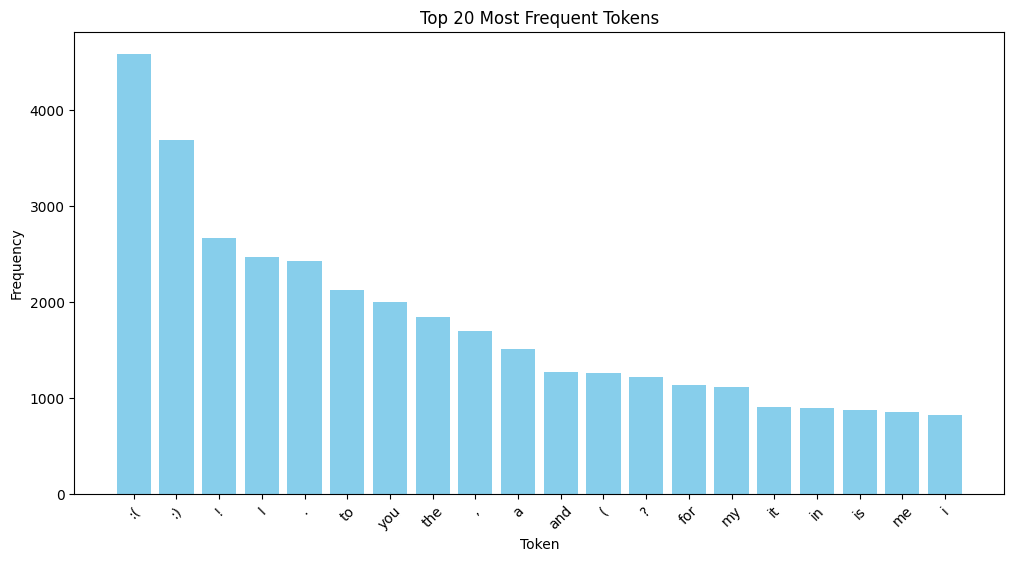

In [59]:
top_tokens = token_freq.most_common(20)
tokens, freqs = zip(*top_tokens)

plt.figure(figsize=(12,6))
plt.bar(tokens, freqs, color='skyblue')
plt.title("Top 20 Most Frequent Tokens")
plt.xticks(rotation=45)
plt.xlabel("Token")
plt.ylabel("Frequency")
plt.show()

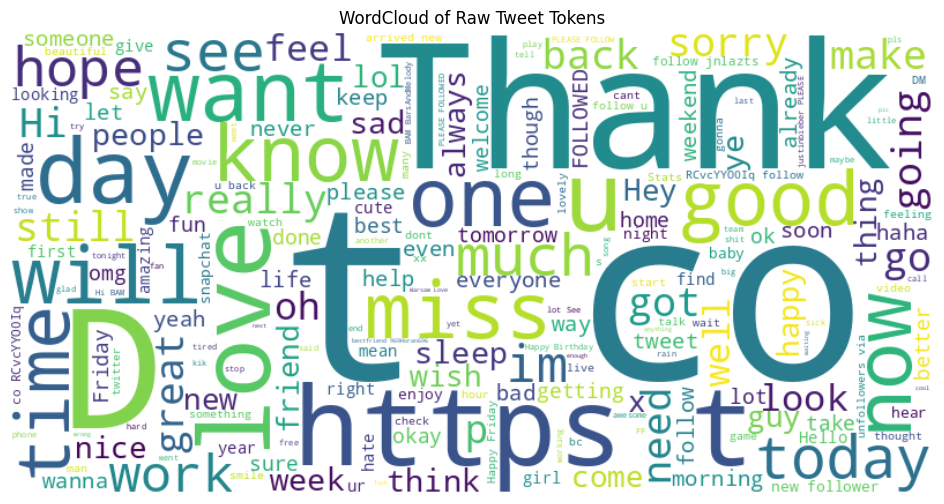

In [57]:
# Creating wordcloud for tokenized tweets 
from wordcloud import WordCloud

text_for_cloud = ' '.join(all_tweet_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_cloud)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Raw Tweet Tokens")
plt.show()
